### Problem Statement: * For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
# Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import os
os.chdir('D:\Study\Data Science and Machine Learning\Great_learning course\Main content\Module7 - TimeSeries Forecasting\Project')
os.getcwd()

'D:\\Study\\Data Science and Machine Learning\\Great_learning course\\Main content\\Module7 - TimeSeries Forecasting\\Project'

## For Data Set 2 "Rose Wine" :

### Ques 1 : Read the data as an appropriate Time Series data and plot the data.

In [3]:
# Reading the data.

rose = pd.read_csv("Rose.csv", parse_dates=True, index_col=0)

In [4]:
# Checking the top 5 and last 5 rows of the data.

print(rose.head())
print(rose.tail())

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
            Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0


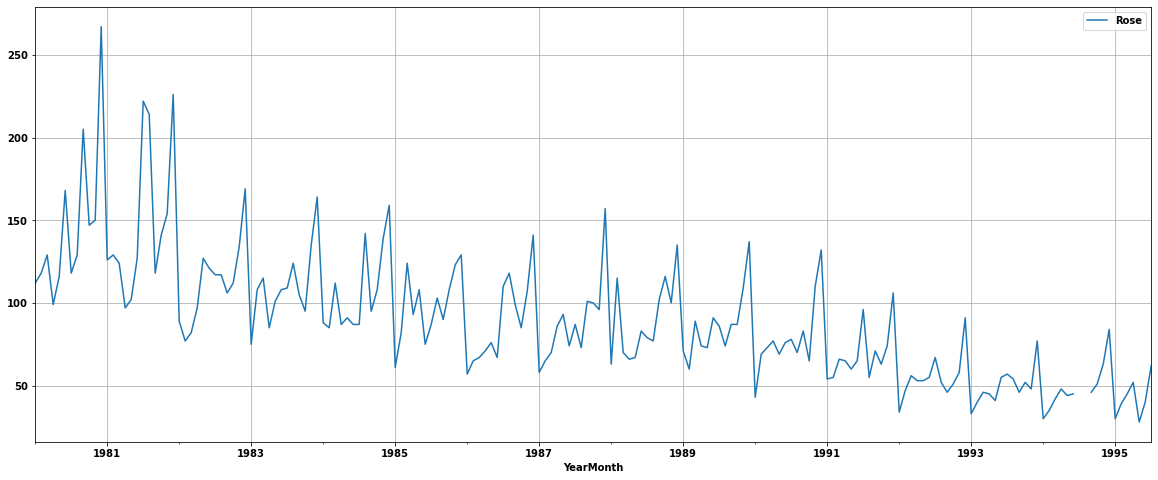

In [5]:
# Plotting the time series to understand the behaviour of the data.

rose.plot(figsize=(20,8))
plt.grid()

#### Inference: 

* The data seems to have decreasing trend and seasonality. 

* Also, there seems to be some sort of discontinuity around 1994, may be a case of missing value. We'll analyse more in the further steps.

### Ques 2 - Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [6]:
# Checking the basic measures by performing descriptive statistics.

round(rose.describe(),3)

,Rose
count,185.000
mean,90.395
std,39.175
min,28.000
25%,63.000
50%,86.000
75%,112.000
max,267.000


####  Inference:

* The dataset has 185 counts. 
* The highest sale value of Rose wine is 267 and the lowest is 28.
* The mean sale value of sparkling wine is 90.39.
* The standard deviation in the sales value is 39.175.

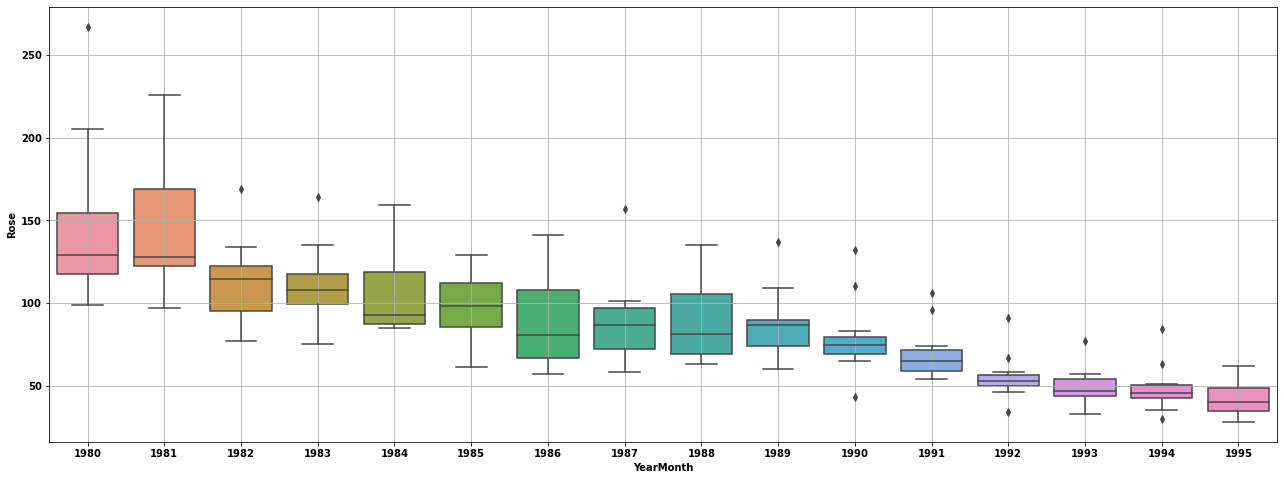

In [7]:
# Plotting the boxplot to understand the spread of sales across different years and within different months across years.

# Yearly BoxPlot of Rose wine
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.year,y = rose['Rose'])
plt.grid();

#### Inference:

* The overall yearly sales of the wine shows a clear decreasing trend. It means over the years the sales of the wine has decreased.

* Also, in most of the years at some parts the sales are two high, resulting in outliers. 

* To analyse it further let's check the monthly sales pattern by plotting monthly boxplots.

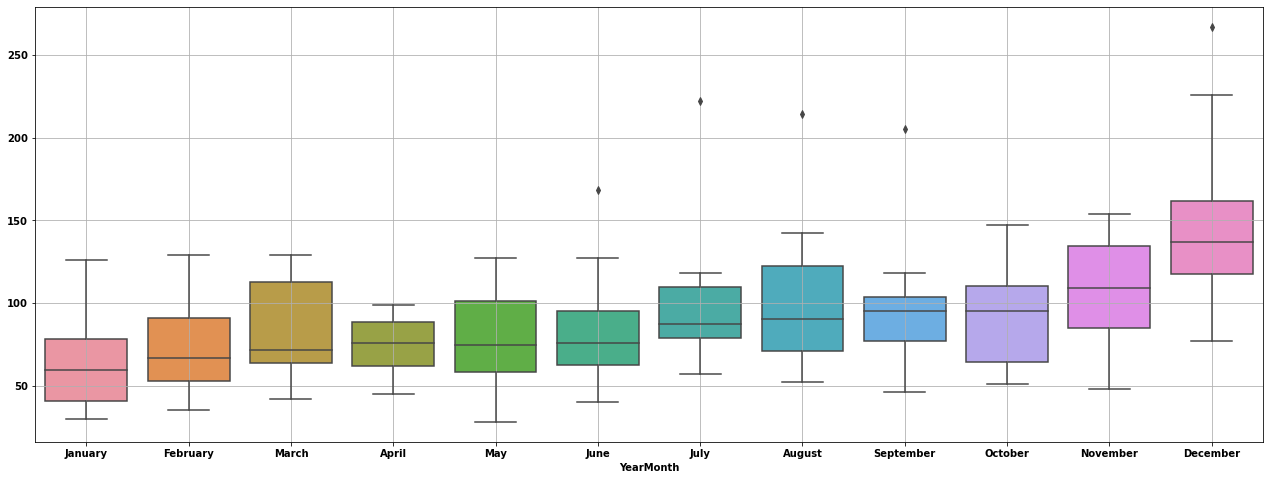

In [8]:
# Monthly Boxplot of sparkling wine.

_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.month_name(),y = rose.values[:,0],ax=ax)
plt.grid();

### Inferences:

* From the above monthly Boxplot, we can infer that the sales of Rose wine is extraordinary high in the month of December.

* There is no fixed monthly trend in sales of Rose wine, it seems that the sales of Rose wine is quite high in the month of October, November and December. 

* There are some outliers present in the month of June, July, August and September. 

In [9]:
# Plotting a pivot table of monthly sales of Rose wines across years.

monthly_sales_across_years = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month_name(), index = rose.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


### Inference:

* As we can notice in the above table, there are some missing values in the year 1994 and 1995. 

* Also we can notice the decline in sales figures as we advance in the years. 

* The highest number of sale '267' happened in December 1980 and the lowest i.e. 28 was in May 1995. 

In [10]:
# Imputing the null values. 

rose = rose.interpolate()
print(rose)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


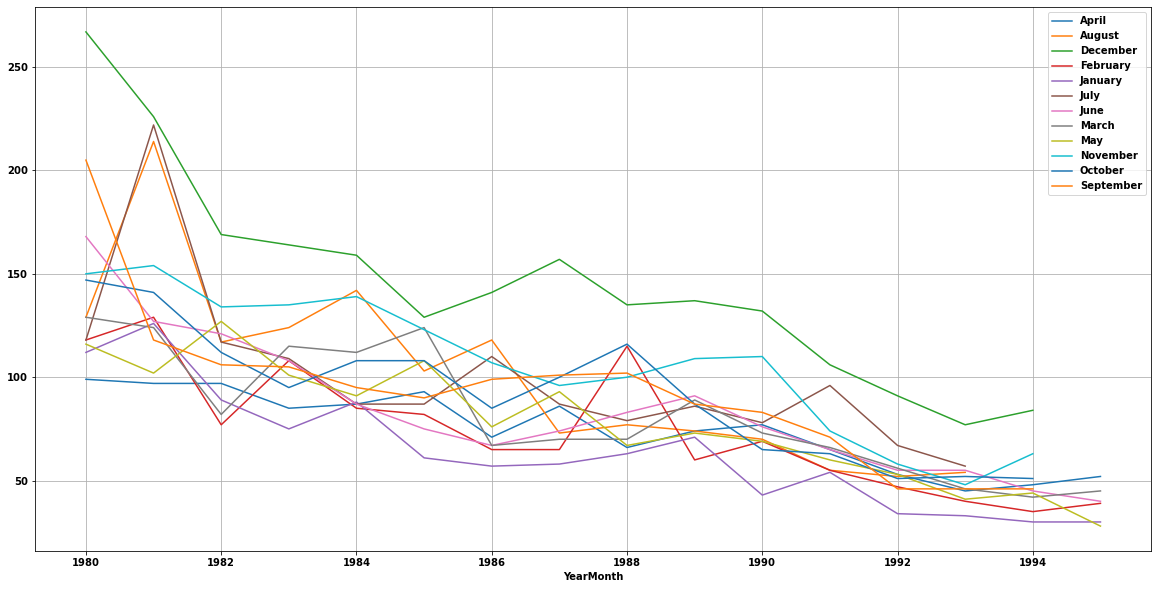

In [11]:
# Plotting a graph for checking the monthly sales of Rose wine across years.

monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

#### Inference:

* The above graph clearly showing the declining trend of the yearly sales of Rose wine.

In [12]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

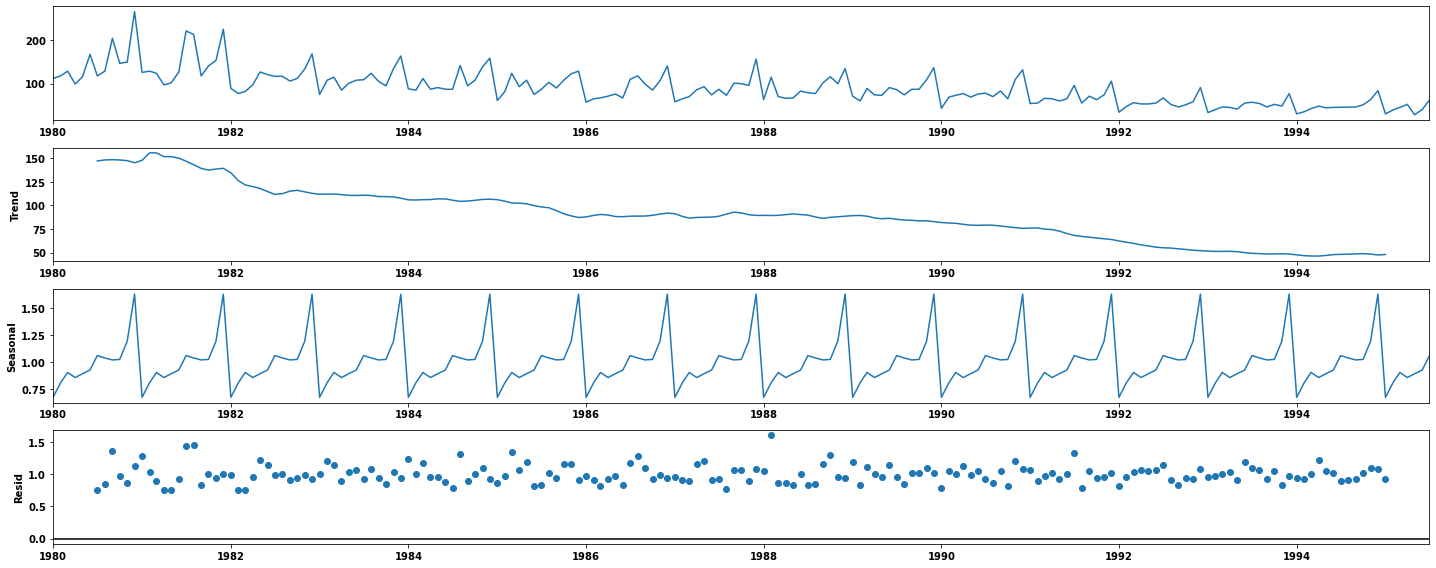

In [13]:
# Decomposing the time series:

from statsmodels.tsa.seasonal import  seasonal_decompose

decomposition = seasonal_decompose(rose,model='multiplicative')
decomposition.plot();

In [14]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

### Inference:

* From the above graphs and tables, we can infer that the data set has declining trend, sesonality is present and residuals are also present.

### Ques 3: Split the data into training and test. The test data should start in 1991.

In [15]:
# Splitting the data into train and test.

train = rose.loc[:'1990-12-1']
test = rose.loc['1-1-1991':]

In [16]:
# Checking the shape of train and test data.

print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Inference: 

* There are 132 values in the train data and 55 values in the test data.

In [17]:
# Checking the 5 top and 5 bottom rows of train and test data.

print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



### Ques 4:   Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [18]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [19]:
# Making new regression variables by copying the train and test data. 

LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [20]:
# Checking first and last five rows of the data.

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0    43
1991-02-01  55.0    44
1991-03-01  66.0    45
1991-04-01  65.0    46
1991-05-01  60.0    47 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0    93
1995-04-01  52.0    94
1995-05-01  28.0    95
1995-06-01  40.0    96
1995-07-01  62.0    97 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [21]:
# importing the model LinearRegression from the sklearn library.

from sklearn.linear_model import LinearRegression

In [22]:
# Assigning LinearRegression to a variable lr.

lr = LinearRegression()

In [23]:
# Fitting the LinearRegression model on train data set of sparkling wine.

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

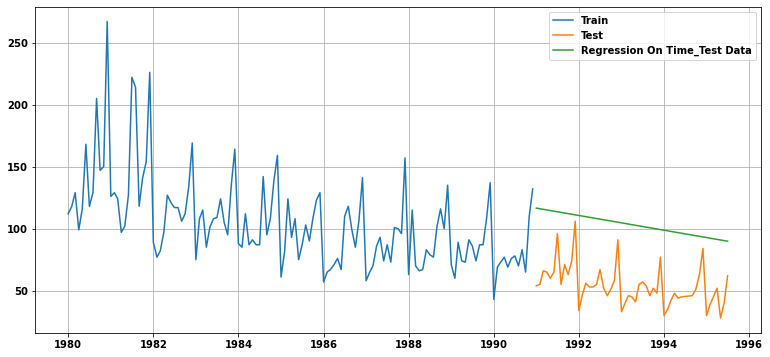

In [24]:
# Predicting and plotting the train and test data.

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [25]:
# Importing the metrics algorithm from sklearn library.

from sklearn import metrics

### Model Evaluation

In [26]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.433


In [27]:
# Making dataframe 'resultsDf' to showcase RMSE value of every model's test data.  

resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,51.433312


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [28]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [29]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

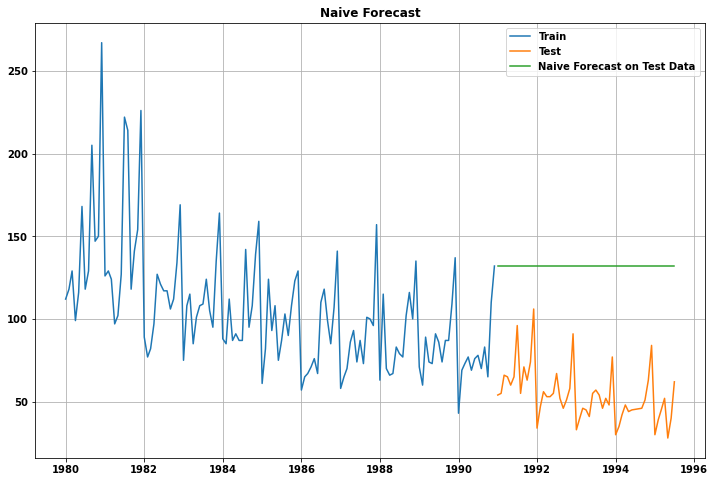

In [30]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [31]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [32]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773


## Model 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [33]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()


In [34]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


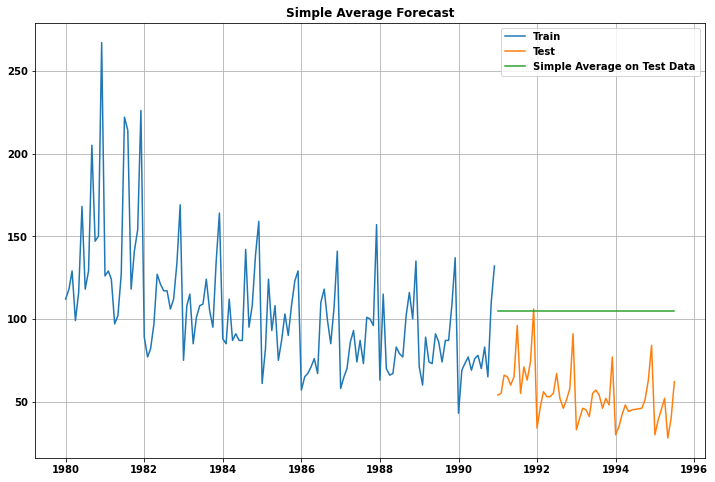

In [35]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [36]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [37]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773
SimpleAverageModel,53.460570


## Model 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [38]:
MovingAverage = rose.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [39]:
#### Trailing moving averages


MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


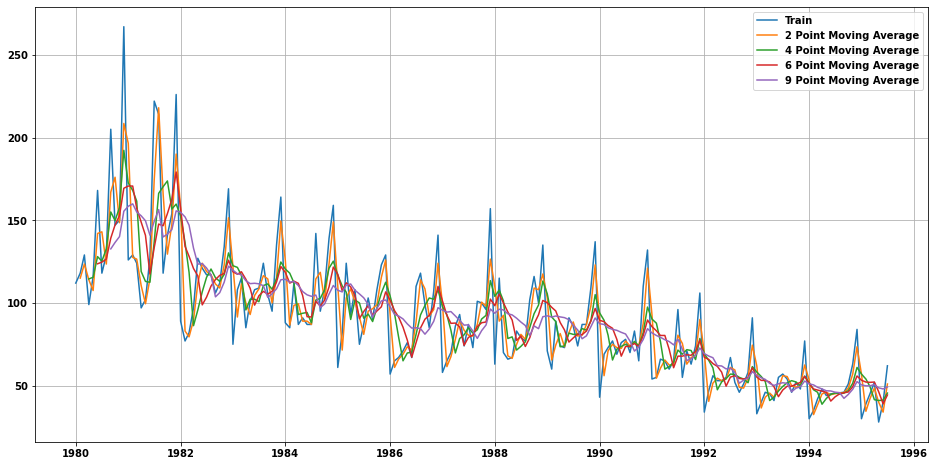

In [40]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [41]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage.loc[:'1990-12-1'] 
trailing_MovingAverage_test=MovingAverage.loc['1-1-1991':]

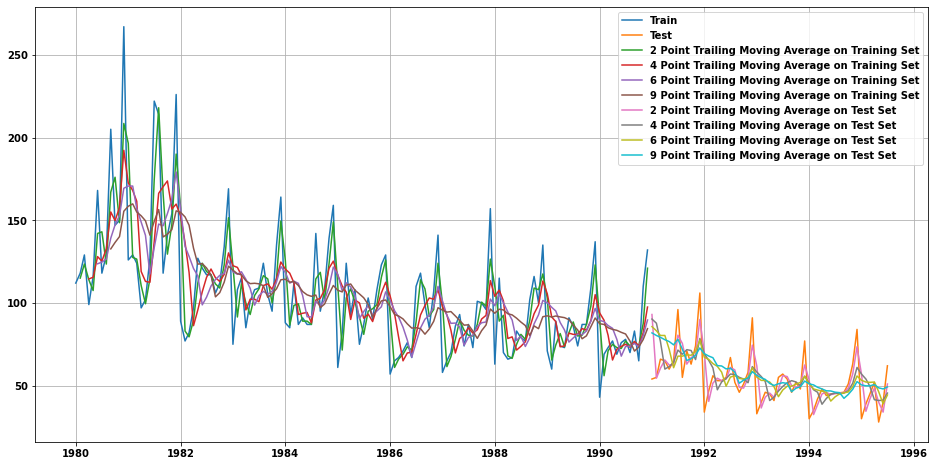

In [42]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [43]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [44]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

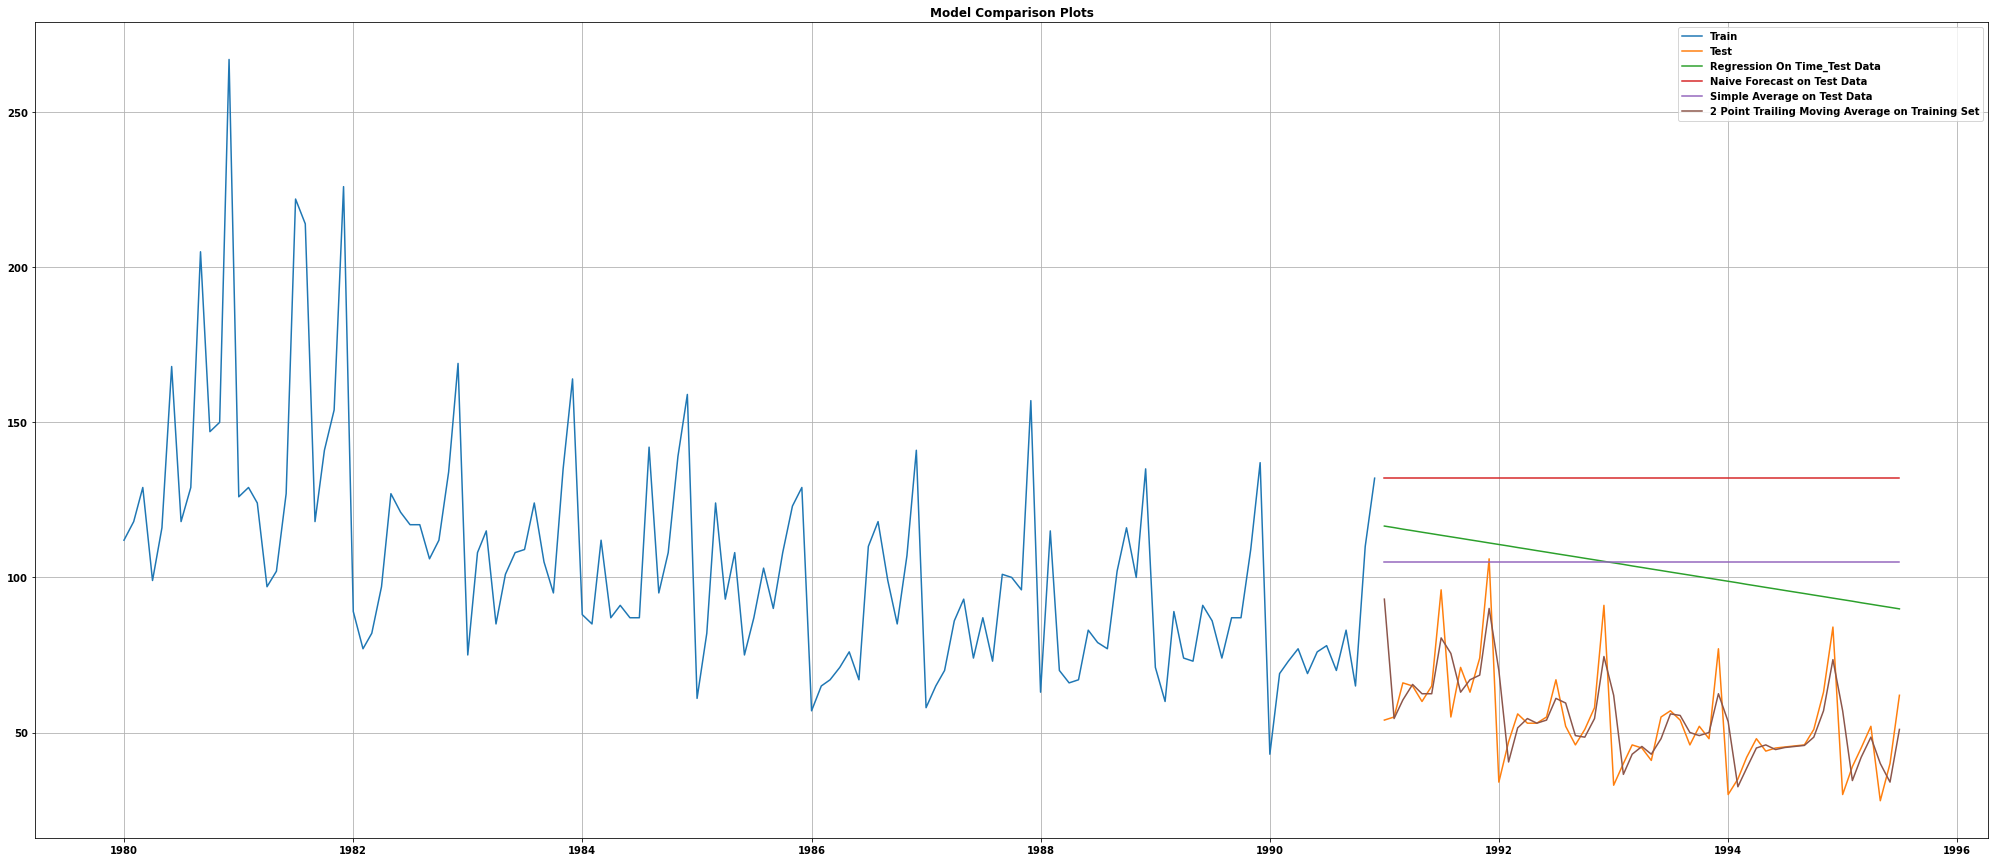

In [45]:
## Plotting on both Training and Test data

plt.figure(figsize=(35,15))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Model 5: Simple Exponential Smoothing

In [46]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [47]:
SES_train = train.copy()
SES_test = test.copy()

In [48]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [49]:
model_SES_autofit = model_SES.fit(optimized=True)

In [50]:
model_SES_autofit.params

{'smoothing_level': 0.09874989825614361,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702255613862,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [51]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104999
1991-02-01,55.0,87.104999
1991-03-01,66.0,87.104999
1991-04-01,65.0,87.104999
1991-05-01,60.0,87.104999


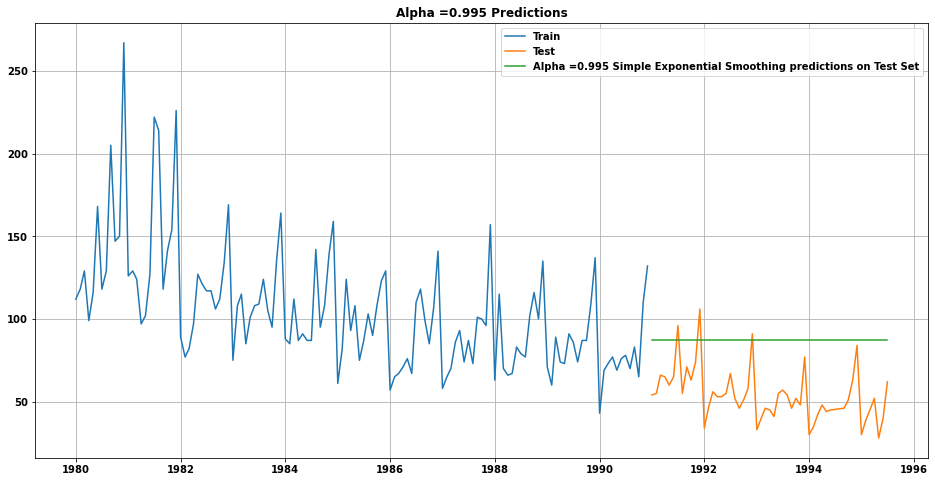

In [52]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

### Model Evaluation for $\alpha$ = 0.995 : Simple Exponential Smoothing

In [53]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [54]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",36.796242


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

## Model 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.


In [55]:
DES_train = train.copy()
DES_test = test.copy()

In [56]:
model_DES = Holt(DES_train['Rose'])

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [57]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [60]:
DES_test = DES_test.dropna()

In [61]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=12)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

Let us sort the data frame in the ascending ordering of the 'Train RMSE' and the 'Test RMSE' values.


In [62]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,76.578703
1,0.3,0.4,37.393239,97.963456
8,0.4,0.3,36.749123,99.290728
16,0.5,0.3,37.433314,116.589492
2,0.3,0.5,38.888325,120.023155


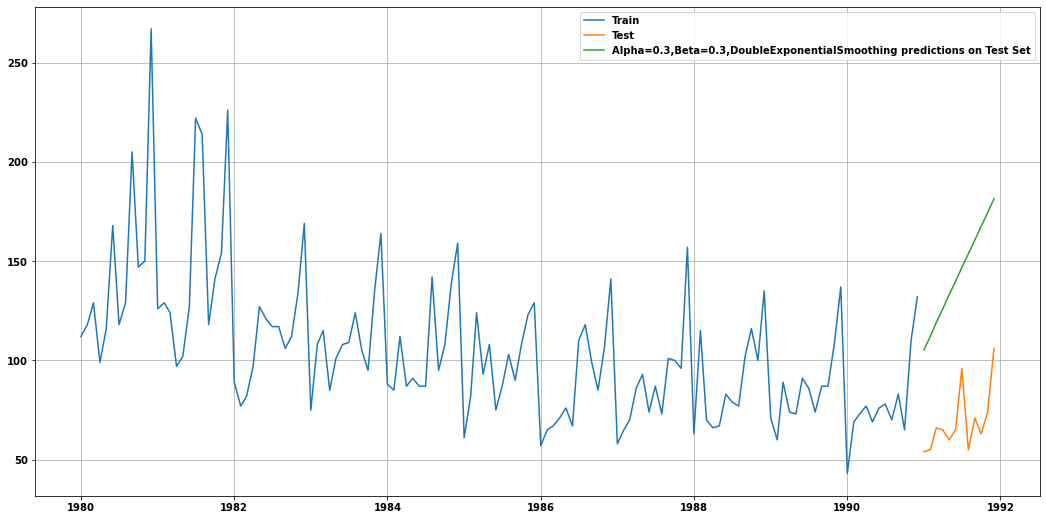

In [63]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [64]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",36.796242
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",76.578703


## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [65]:
TES_train = train.copy()
TES_test = test.copy()

In [66]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='Multiplicative',seasonal='Multiplicative')

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [67]:
model_TES_autofit = model_TES.fit()

In [68]:
model_TES_autofit.params

{'smoothing_level': 0.07575498491618392,
 'smoothing_trend': 0.05410792451676346,
 'smoothing_seasonal': 0.41075474283610686,
 'damping_trend': nan,
 'initial_level': 76.6517015524765,
 'initial_trend': 1.0031988870150088,
 'initial_seasons': array([1.64203836, 1.70241635, 1.78003798, 1.58941063, 1.74686375,
        2.19206507, 2.30827981, 2.37758346, 2.67486291, 2.00335177,
        2.1845955 , 3.48382194]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,50.515439
1991-02-01,55.0,66.534058
1991-03-01,66.0,70.361539
1991-04-01,65.0,68.077099
1991-05-01,60.0,65.851163


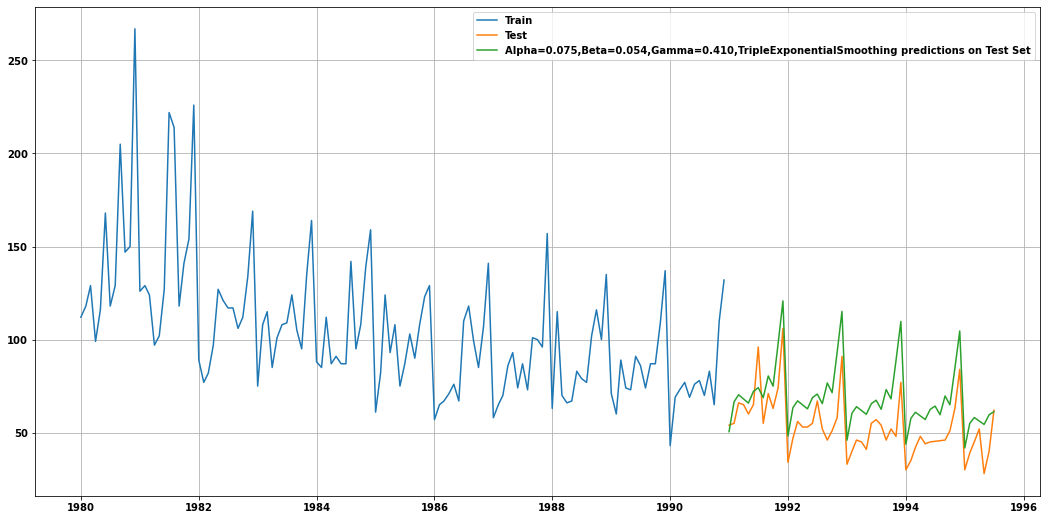

In [70]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.075,Beta=0.054,Gamma=0.410,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [71]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.075,Beta=0.054,Gamma=0.410, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.075,Beta=0.054,Gamma=0.410, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.803


In [72]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.075,Beta=0.054,Gamma=0.410,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",36.796242
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",76.578703
"Alpha=0.075,Beta=0.054,Gamma=0.410,TripleExponentialSmoothing",17.802771


In [73]:
## First we will define an empty dataframe to store our values from the loop


resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [78]:
TES_test = TES_test.dropna()

In [80]:
for i in np.arange(0.3,1.1,0.3):
    for j in np.arange(0.3,1.1,0.3):
        for k in np.arange(0.3,1.1,0.3):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [81]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
384,0.3,0.4,0.4,29.861485,10.089305
377,0.3,0.3,0.5,29.136530,10.301055
2,0.3,0.3,0.5,26.182447,10.428903
9,0.3,0.4,0.4,25.600699,10.530741
376,0.3,0.3,0.4,28.556346,10.860806


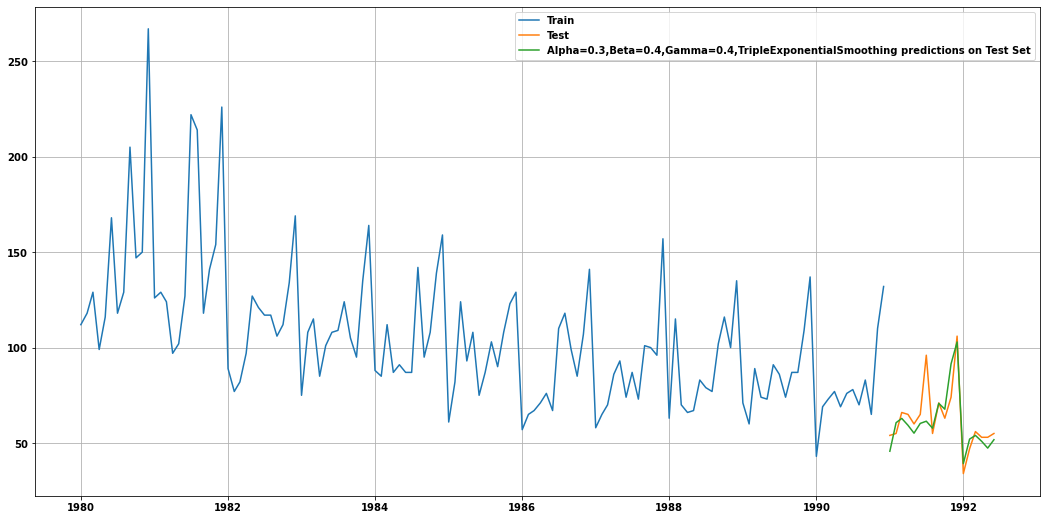

In [82]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')


plt.plot(TES_test['predict', 0.3, 0.4, 0.4], label='Alpha=0.3,Beta=0.4,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [83]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.4,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,51.433312
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.995,SimpleExponentialSmoothing",36.796242
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",76.578703
"Alpha=0.075,Beta=0.054,Gamma=0.410,TripleExponentialSmoothing",17.802771


In [84]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.4,TripleExponentialSmoothing",10.089305
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.075,Beta=0.054,Gamma=0.410,TripleExponentialSmoothing",17.802771
"Alpha=0.995,SimpleExponentialSmoothing",36.796242
RegressionOnTime,51.433312
SimpleAverageModel,53.460570
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",76.578703


### Inferences:

* The top three models according to their RMSE values are as follows:

1) Tripple Exponential Smoothing (Alpha=0.3,Beta=0.4,Gamma=0.4) 

2) 2point Trailing Moving Average 

3) 4point Trailing Moving Average.

### Ques 5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [85]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

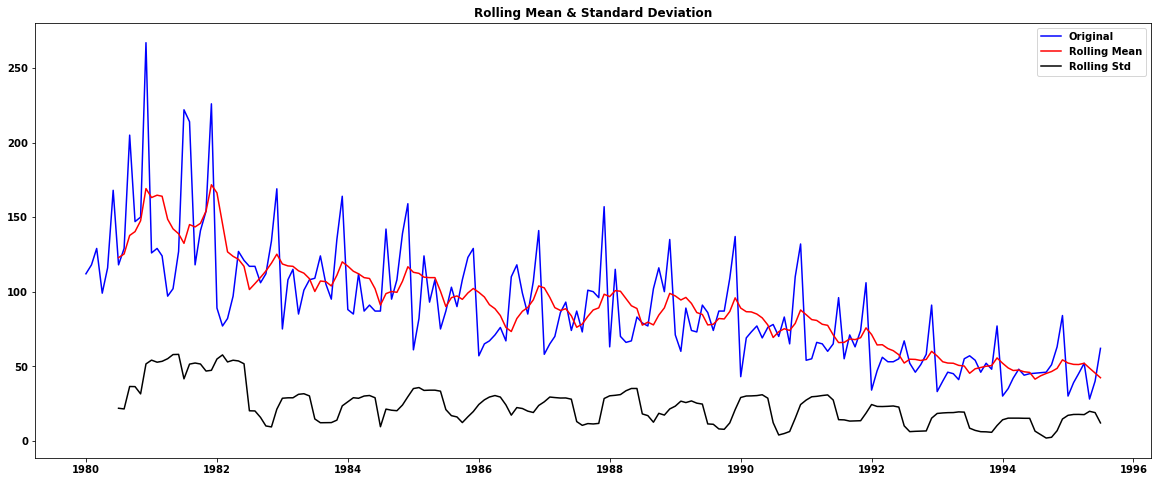

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [86]:
test_stationarity(rose['Rose'])

### Inferences:

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

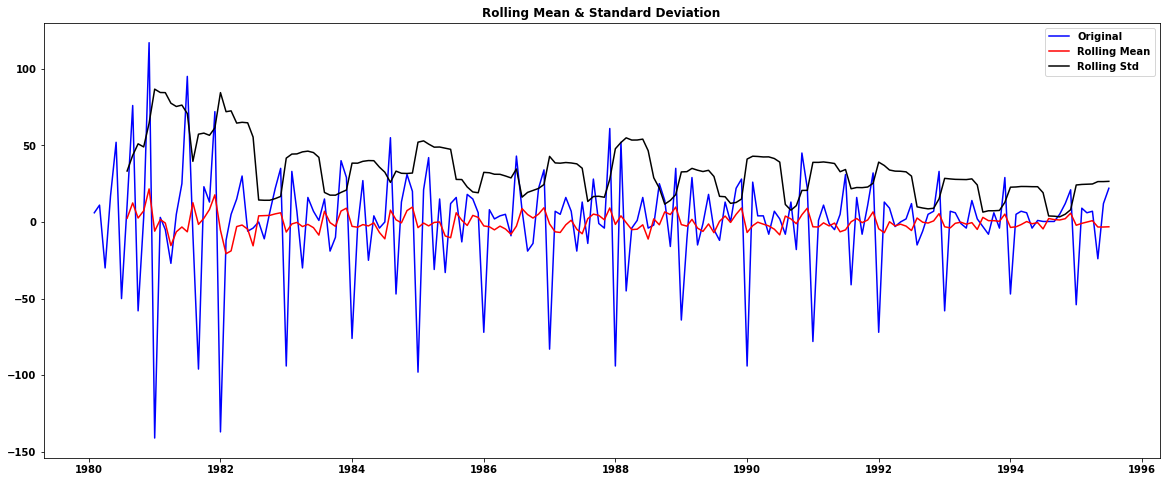

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [87]:
test_stationarity(rose['Rose'].diff().dropna())

### Inferences:


* After applying one order of differencing, We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

### Ques 6: Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion.

In [88]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [89]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [90]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464295
ARIMA(0, 1, 2) - AIC:1276.8353724265137
ARIMA(1, 1, 0) - AIC:1319.3483105801872


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 1) - AIC:1277.7757518319213


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 2) - AIC:1277.3592222082798
ARIMA(2, 1, 0) - AIC:1300.6092611743966


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:1279.0456894093181
ARIMA(2, 1, 2) - AIC:1279.298693936517


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [91]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835372
5,"(1, 1, 2)",1277.359222
4,"(1, 1, 1)",1277.775752
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [92]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 13 Feb 2022   AIC                           1276.835
Time:                        00:52:10   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

## Predict on the Test Set using this model and evaluate the model.

In [93]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [94]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.617949345778039


In [95]:
resultsDf1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto ARIMA(0,1,2)'])

resultsDf1

,Test RMSE
"Auto ARIMA(0,1,2)",15.617949


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

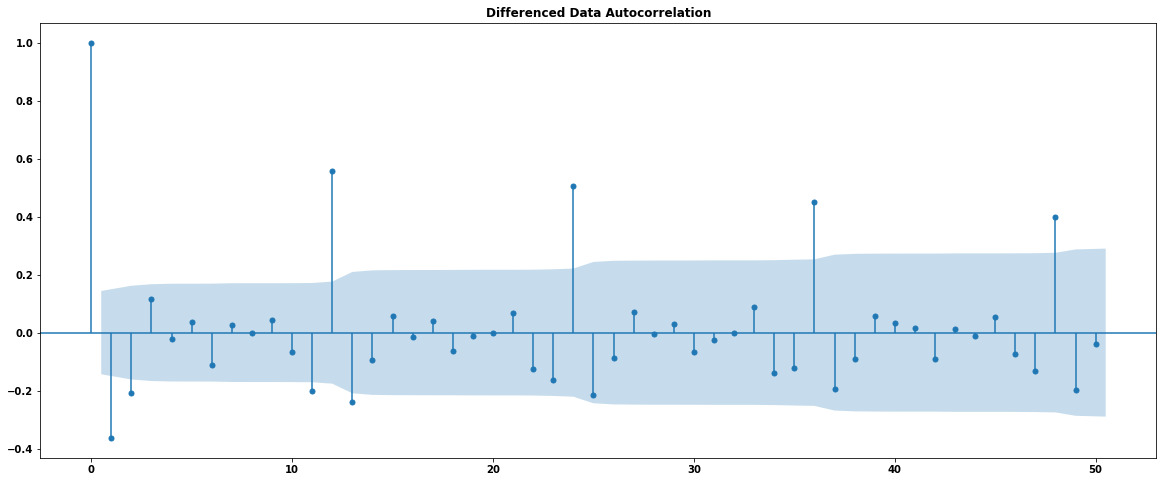

In [97]:
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality as 6.

In [98]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [99]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [100]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113854
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827247
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625166
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149039
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.309326672173
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.986174312435
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515101
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426217649
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.804820641782
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.546583469527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139882
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425051546888
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917096218202
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029548
SARIMA(0, 1, 1)x(0, 0, 2, 6) - A

In [101]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744297
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582102
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205610
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951


In [102]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 13 Feb 2022   AIC                            951.744
Time:                                   01:15:35   BIC                            981.349
Sample:                                        0   HQIC                           963.750
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.082     -6.106      0.000      -0.664      -0.341
ar.L2         -0.6628      0.083     -7.952

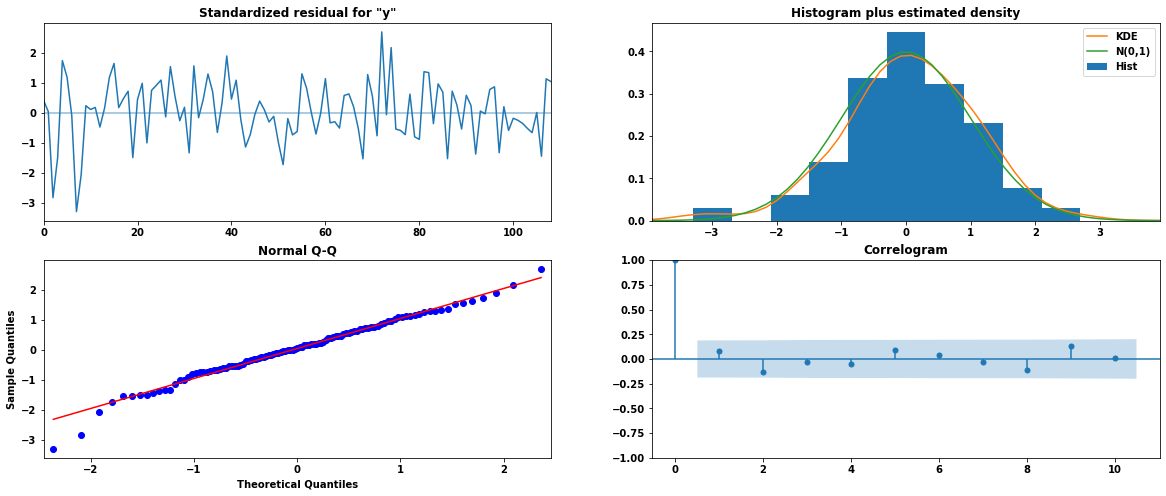

In [103]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [104]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [105]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,66.899754,16.350613,34.853141,98.946367
1,65.987594,16.481842,33.683778,98.291410
2,74.438926,16.587783,41.927468,106.950383
3,76.040466,16.710380,43.288724,108.792209
4,78.415952,16.710992,45.663009,111.168895


In [106]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

27.12531654215724


In [107]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto SARIMA(2,1,3)(2,0,3,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"Auto ARIMA(0,1,2)",15.617949
"Auto SARIMA(2,1,3)(2,0,3,6)",27.125317


### Inferences:

* We can clearly see that by including the seasonal parameter, the value of RMSE increases.

* Auto ARIMA with paramteres p=0, d=1, q=2, performed way better than Auto SARIMA model.

## Ques-7: Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Building ARIMA Model based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

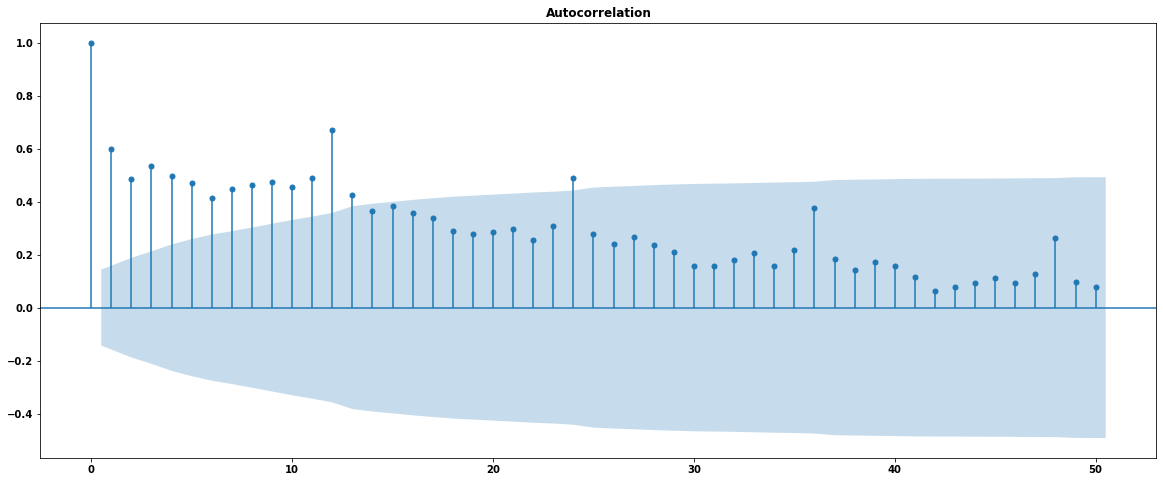

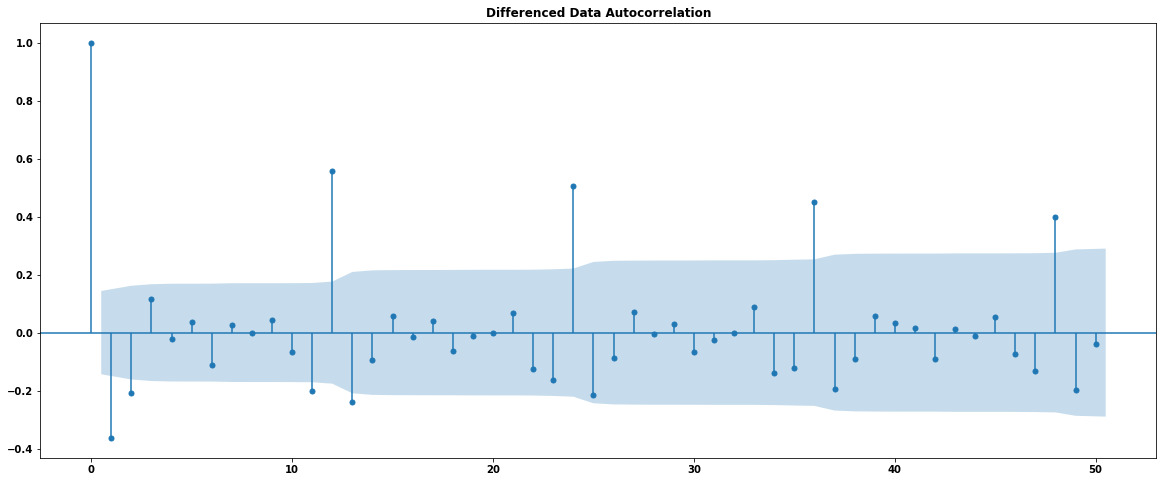

In [110]:
# Plotting ACF Plot.

plot_acf(rose['Rose'],lags=50)
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

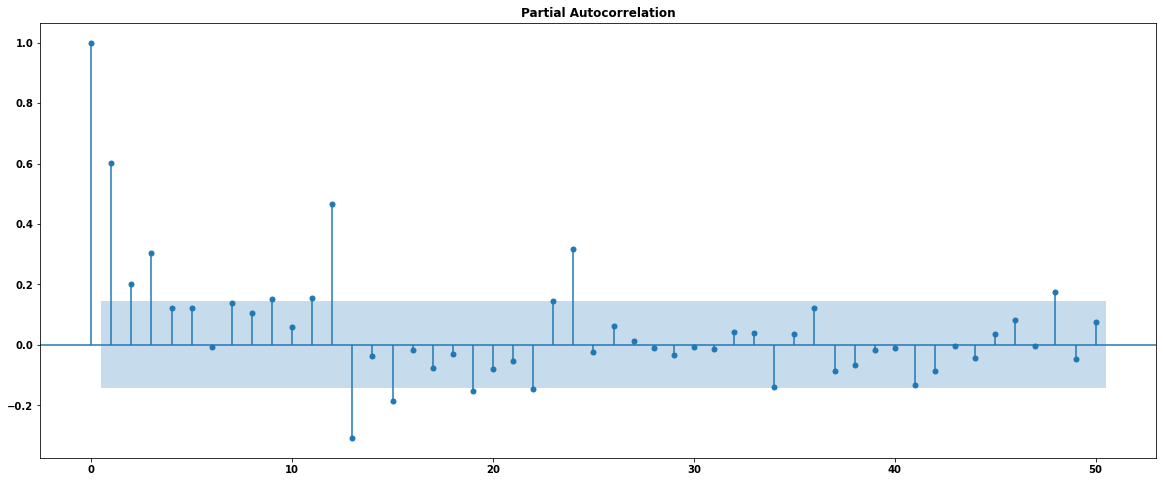

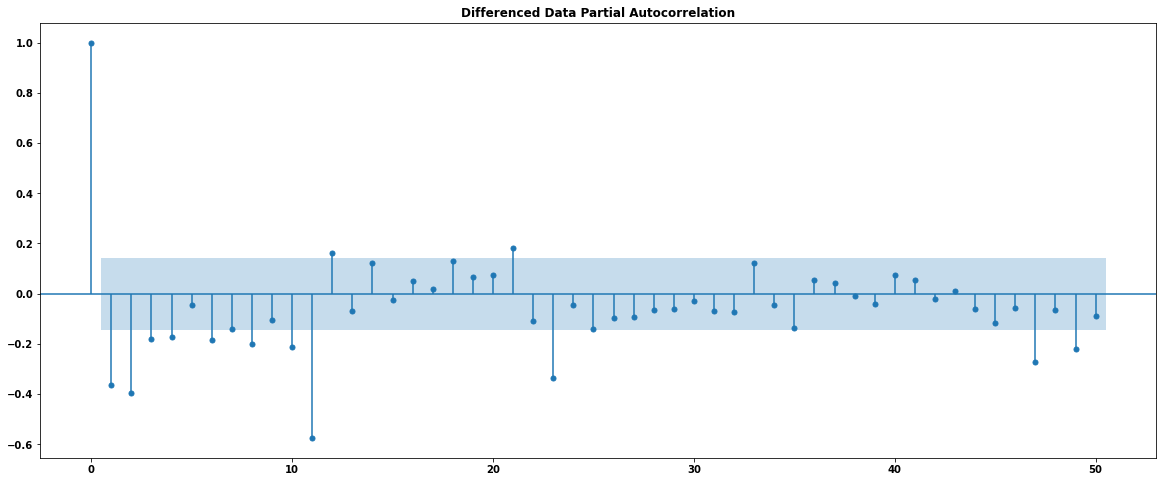

In [111]:
# Plotting PACF Plot.

plot_pacf(rose['Rose'],lags=50)
plot_pacf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to .

By looking at the above differenced data correlation plots, we can say that both the PACF and ACF plot cuts-off at lag 5 and 3, so here p=5, q=3 and d=1.

In [116]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(5,1,3))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -629.930
Method:                       css-mle   S.D. of innovations             28.662
Date:                Sun, 13 Feb 2022   AIC                           1279.860
Time:                        01:42:25   BIC                           1308.612
Sample:                    02-01-1980   HQIC                          1291.544
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4934      0.085     -5.817      0.000      -0.660      -0.327
ar.L1.D.Rose    -0.8630      0.092     -9.403      0.000      -1.043      -0.683
ar.L2.D.Rose    -0.7705      0.119     -6.48

### Predict on the Test Set using this model and evaluate the model.

In [117]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [118]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)


15.633262360225679


In [119]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA(5,1,3)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,Test RMSE
"Auto ARIMA(0,1,2)",15.617949
"Auto SARIMA(2,1,3)(2,0,3,6)",27.125317
"Manual ARIMA(4,1,2)",33.949303
"Manual ARIMA(5,1,3)",15.633262


### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 5. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 3.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

In [120]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(5, 1, 3),
                                seasonal_order=(5, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(5, 1, 3)x(5, 1, 3, 6)   Log Likelihood                -363.203
Date:                           Sun, 13 Feb 2022   AIC                            760.406
Time:                                   01:47:17   BIC                            802.903
Sample:                                        0   HQIC                           777.543
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1794      0.171     -6.908      0.000      -1.514      -0.845
ar.L2         -1.2154      0.221     -5.490

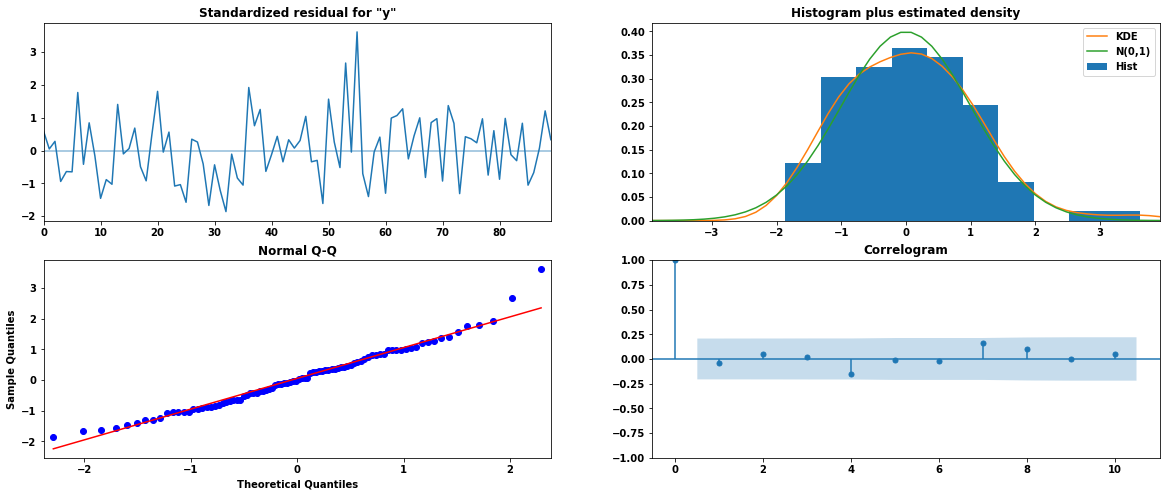

In [121]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [122]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [123]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,40.677812,11.166366,18.792136,62.563488
1,62.919384,11.544018,40.293525,85.545243
2,81.722433,11.632162,58.923814,104.521052
3,63.267608,11.792120,40.155478,86.379739
4,63.445921,12.030058,39.867440,87.024401


In [124]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

16.280930881931944


In [125]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(5,1,3)(5,1,3,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1.sort_values(by=['Test RMSE'])

,Test RMSE
"Auto ARIMA(0,1,2)",15.617949
"Auto SARIMA(2,1,3)(2,0,3,6)",27.125317
"Manual ARIMA(4,1,2)",33.949303
"Manual ARIMA(5,1,3)",15.633262
"Manual SARIMA(5,1,3)(5,1,3,6)",16.280931


In [126]:
resultsDf1.sort_values(by=['Test RMSE'])

,Test RMSE
"Auto ARIMA(0,1,2)",15.617949
"Manual ARIMA(5,1,3)",15.633262
"Manual SARIMA(5,1,3)(5,1,3,6)",16.280931
"Auto SARIMA(2,1,3)(2,0,3,6)",27.125317
"Manual ARIMA(4,1,2)",33.949303


### Inferences:

* It is evident from the above RMSE scores of the models that even after choosing the parameters manually by looking at the ACF and PACF plots, the Auto ARIMA model with parameters p=0,d=1 and q=2 has given the best RMSE scores among all, however manual ARIMA model with parameters p=5, d=1, and q=3 has given the almost same RMSE score as Auto ARIMA model.  

### Ques-8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [127]:
Models_RMSE = pd.concat([resultsDf,resultsDf1])

In [128]:
Models_RMSE.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.3,Beta=0.4,Gamma=0.4,TripleExponentialSmoothing",10.089305
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Auto ARIMA(0,1,2)",15.617949
"Manual ARIMA(5,1,3)",15.633262
"Manual SARIMA(5,1,3)(5,1,3,6)",16.280931
"Alpha=0.075,Beta=0.054,Gamma=0.410,TripleExponentialSmoothing",17.802771
"Auto SARIMA(2,1,3)(2,0,3,6)",27.125317


### Inferences: 

* From the above table, we can clearly infer that the top three models according to their RMSE scores are as follows:

1) Tripple Exponential Smoothing (Alpha=0.3, Beta=0.4, Gamma=0.4)

2) 2Point Trailing Moving Average.

3) 4Point Trailing Moving Average.

## Ques9) Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


### Building the most optimum model 'TrippleExponentialSmoothing(Alpha=0.3, Beta=0.4, Gamma=0.4)

In [130]:
fullmodel1 = ExponentialSmoothing(rose,
                                  trend='Multiplicative',
                                  seasonal='Multiplicative').fit(smoothing_level=0.3,
                                                                smoothing_trend=0.4,
                                                                smoothing_seasonal=0.4)

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [132]:
RMSE_fullmodel1 = metrics.mean_squared_error(rose['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE for Complete Model for Exponential Smoothing :',round(RMSE_fullmodel1))

RMSE for Complete Model for Exponential Smoothing : 22


<B> 95 Percent Confidence Interval Table

In [134]:
prediction_1 = fullmodel1.forecast(steps=12)

In [135]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head().round(2)

,lower_CI,prediction,upper_ci
1995-08-01,-2.53,41.12,84.76
1995-09-01,-5.41,38.23,81.87
1995-10-01,-4.02,39.63,83.27
1995-11-01,1.11,44.75,88.39
1995-12-01,19.54,63.19,106.83


<B>12 month Forecast along with confidence interval

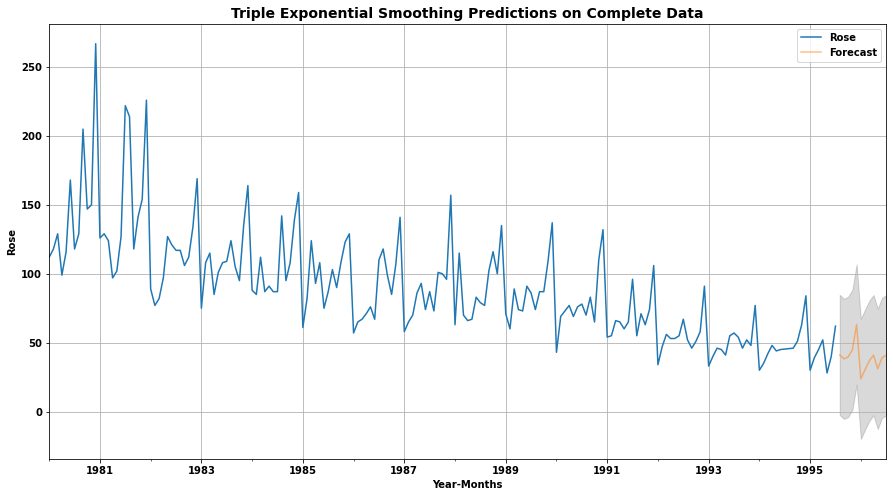

In [137]:
# plot the forecast along with the confidence band

axis = rose.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.title('Triple Exponential Smoothing Predictions on Complete Data', fontsize=14);
plt.legend(loc='best')
plt.grid()
plt.show()

### Ques 10- Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

* Refer Report